<a href="https://colab.research.google.com/github/anatolii-kandiuk/research_students_df/blob/main/research_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('sample_data/StudentsPerformance.csv')
print(df.iloc[0:7])

   gender race/ethnicity  ... reading score writing score
0  female        group B  ...            72            74
1  female        group C  ...            90            88
2  female        group B  ...            95            93
3    male        group A  ...            57            44
4    male        group C  ...            78            75
5  female        group B  ...            83            78
6  female        group B  ...            95            92

[7 rows x 8 columns]


In [23]:
df.shape

(1000, 8)

In [24]:
df.size

8000

In [25]:
(df['lunch'] != 'standard').mean()

0.355

In [26]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [27]:
df.loc[(df.lunch == 'standard'), ['reading score', 'math score', 'writing score']].mean() 

reading score    71.654264
math score       70.034109
writing score    70.823256
dtype: float64

In [28]:
df.loc[(df.lunch != 'standard'), ['reading score', 'math score', 'writing score']].mean() 

reading score    64.653521
math score       58.921127
writing score    63.022535
dtype: float64

In [29]:
df.loc[(df.lunch == 'standard'), ['reading score', 'math score', 'writing score']].var() 

reading score    191.285560
math score       186.418089
writing score    205.620887
dtype: float64

In [30]:
df.loc[(df.lunch != 'standard'), ['reading score', 'math score', 'writing score']].var() 

reading score    221.871139
math score       229.824270
writing score    238.202881
dtype: float64

In [31]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [32]:
df = df.rename(columns={
    'gender':'gender',
    'race/ethnicity':'race_ethnicity',
    'parental level of education':'parental_level_of_education',
    'lunch':'lunch',
    'test preparation course':'test_preparation_course',
    'math score':'math_score',
    'reading score':'reading_score',
    'writing score':'writing_score'    

})
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [33]:
math_score_max = 100
df.query('math_score == @math_score_max')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


In [34]:
df.filter(like='score').head(1)

,math_score,reading_score,writing_score
0,72,72,74


In [35]:
acc_df = pd.read_csv('sample_data/accountancy.csv')
acc_df.tail()

,Unnamed: 0,Executor,Type,Salary
45,45,Loopa,D,146
46,46,Loopa,A,58
47,47,Loopa,C,54
48,48,Pupa,F,142
49,49,Loopa,D,128


In [36]:
acc_df.describe()

,Unnamed: 0,Salary
count,50.00000,50.000000
mean,24.50000,145.140000
std,14.57738,61.373733
min,0.00000,50.000000
25%,12.25000,85.250000
50%,24.50000,146.000000
75%,36.75000,192.250000
max,49.00000,249.000000


In [37]:
acc_df.groupby(['Executor', 'Type']).aggregate({'Salary':'mean'})

Salary
Executor Type            
Loopa    A      58.000000
         B     145.166667
         C     154.333333
         D     137.714286
         E     164.000000
         F     238.000000
Pupa     A     160.833333
         B      77.000000
         C      74.500000
         D     146.500000
         E     131.200000
         F     136.250000

In [38]:
dota2_df = pd.read_csv('sample_data/dota_hero_stats.csv')
dota2_df.tail()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
116,116,Melee,129,2,Mars,npc_dota_hero_mars,str,"['Carry', 'Initiator', 'Disabler', 'Durable']"


In [39]:
dota2_df.groupby(['attack_type', 'primary_attr']).nunique().id

attack_type  primary_attr
Melee        agi             19
             int              2
             str             35
Ranged       agi             18
             int             40
             str              3
Name: id, dtype: int64

In [40]:
algae_df = pd.read_csv('sample_data/algae.csv')
algae_df.tail()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [41]:
np.around(algae_df.query("genus=='Fucus'")
                  .alanin
                  .describe()
                  .loc[['min', 'max', 'mean']]
                  .values, decimals=2)

array([0.35, 6.64, 3.57])

In [42]:
algae_df.groupby('group').citrate.var()

group
brown    5.468942
green    3.950113
red           NaN
Name: citrate, dtype: float64

In [43]:
algae_df.groupby('group').species.nunique()

group
brown    6
green    3
red      1
Name: species, dtype: int64

In [44]:
algae_df.groupby('group').aggregate({'sucrose':lambda x:max(x)-min(x)})

,sucrose
group,
brown,5.189345
green,3.259662
red,0.000000


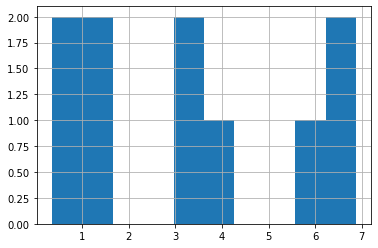

In [45]:
algae_df.alanin.hist()

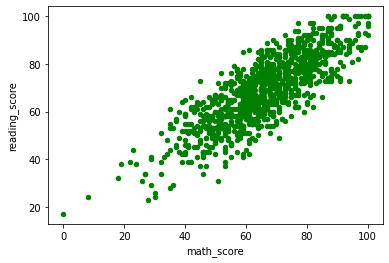

In [46]:
df.plot.scatter(x='math_score', y='reading_score', c='green')

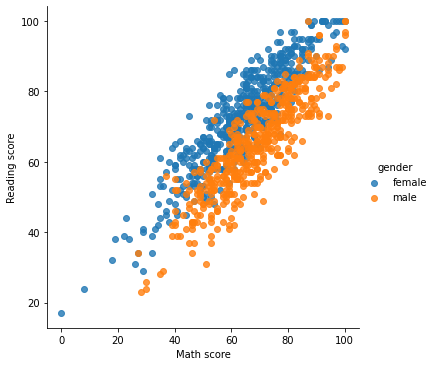

In [47]:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender', data=df, fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

In [48]:
income_df = pd.read_csv('sample_data/income.csv')
income_df.tail(3)

,income
2019-01-31,180
2019-02-28,380
2019-03-31,660


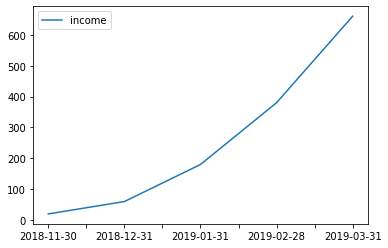

In [49]:
income_df.plot(kind='line')

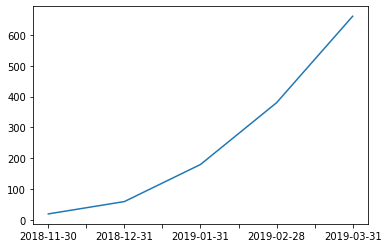

In [50]:
income_df.income.plot()

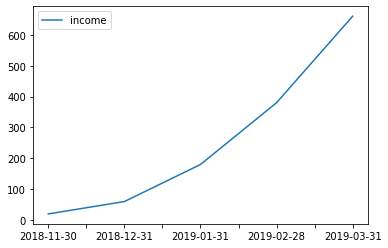

In [51]:
income_df.plot()

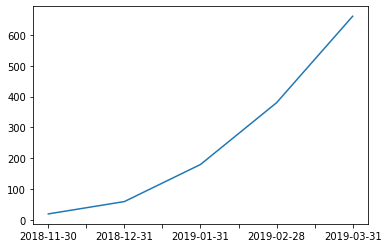

In [52]:
income_df['income'].plot()

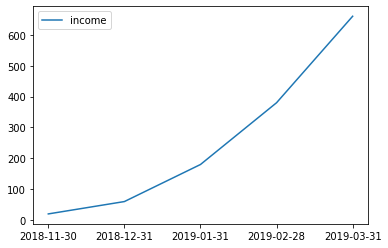

In [53]:
sns.lineplot(data=income_df)

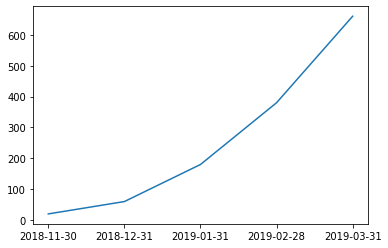

In [54]:
plt.plot(income_df.index, income_df.income)

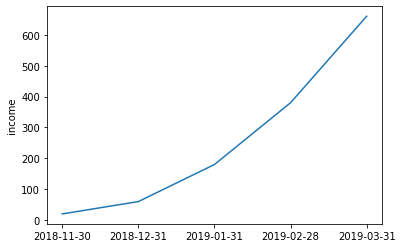

In [55]:
sns.lineplot(x=income_df.index, y=income_df.income)

In [109]:
dataset = pd.read_table('/content/dataset.txt', sep=' ')
dataset.tail(3)

,x,y
57,393.361716,1497.511384
58,394.946732,1494.605527
59,1205.958471,597.572105


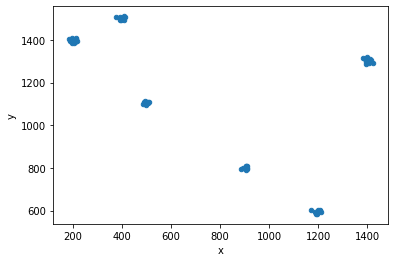

In [110]:
dataset.plot.scatter(x='x', y='y')

In [61]:
genome_df = pd.read_csv('genome_matrix.csv')
genome_df = genome_df.drop('Unnamed: 0', axis=1)
genome_df

,species0,species1,species2,species3,species4
0,0.536029,0.920292,0.679708,0.840606,0.430842
1,0.920292,0.862417,0.887593,0.769754,0.203214
2,0.679708,0.887593,0.595156,0.003435,0.096052
3,0.840606,0.769754,0.003435,0.458870,0.029251
4,0.430842,0.203214,0.096052,0.029251,0.642109


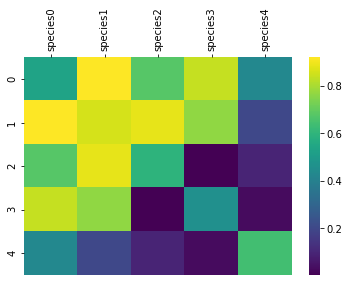

In [62]:


g = sns.heatmap(data=genome_df, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [63]:
dota2_df.head(3)

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"


In [64]:
dota2_df['count_roles'] = dota2_df['roles'].str.split(',').str.len()
dota2_df.head(3)

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles,count_roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4


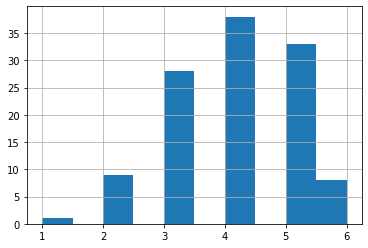

In [65]:
dota2_df.count_roles.hist()

In [66]:
iris_df = pd.read_csv('iris.csv')
iris_df = iris_df.drop('Unnamed: 0', axis=1)
iris_df = iris_df.rename(columns={'sepal length':'sepal_length',
                                  'sepal width':'sepal_width',
                                  'petal length':'petal_length',
                                  'petal width':'petal_width'})
iris_df.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


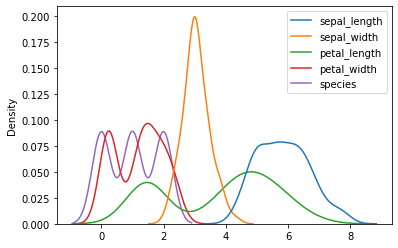

In [72]:
sns.kdeplot(data=iris_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

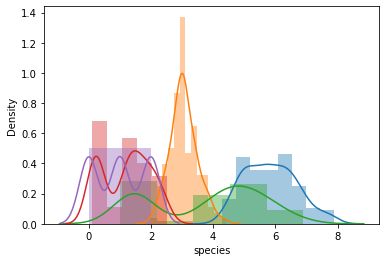

In [74]:
for i in iris_df.columns:
    sns.distplot(iris_df[i])

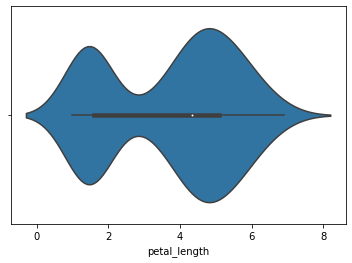

In [82]:
sns.violinplot(x=iris_df["petal_length"])

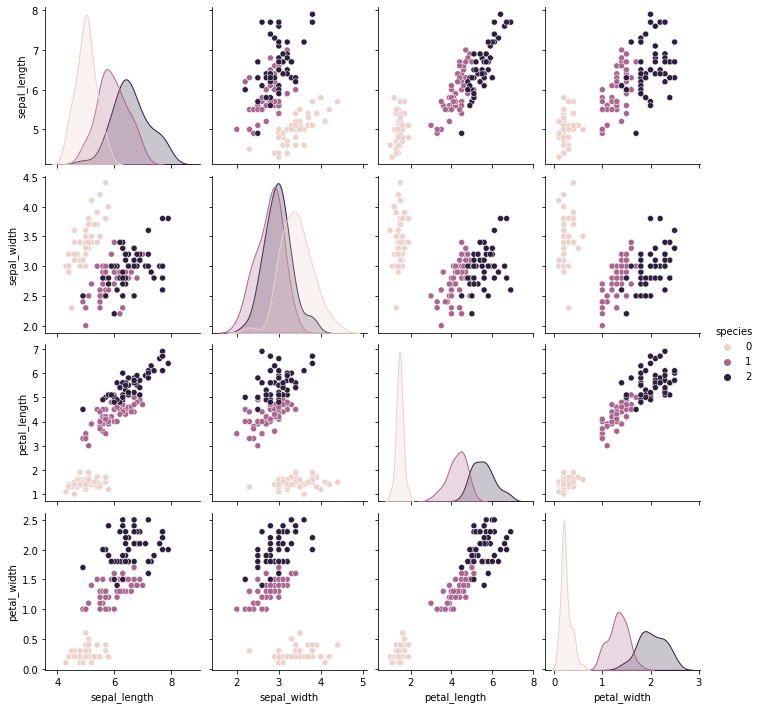

In [84]:
sns.pairplot(iris_df, hue="species")